In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* focus is always to understand the final data structure
* support each step by visual analytics

## Johns Hopkins GITHUB csv data


In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335


In [4]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/3/20', '9/4/20', '9/5/20', '9/6/20', '9/7/20', '9/8/20', '9/9/20',
       '9/10/20', '9/11/20', '9/12/20'],
      dtype='object', length=235)

In [5]:
time_idx=pd_raw.columns[4:]

In [6]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
country_list=pd_raw['Country/Region'].unique()

In [8]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,len(df_plot)::].sum(axis=0)[0:len(df_plot)]

9/9/20     256433
9/10/20    258149
9/11/20    259735
9/12/20    260817
dtype: int64

In [9]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

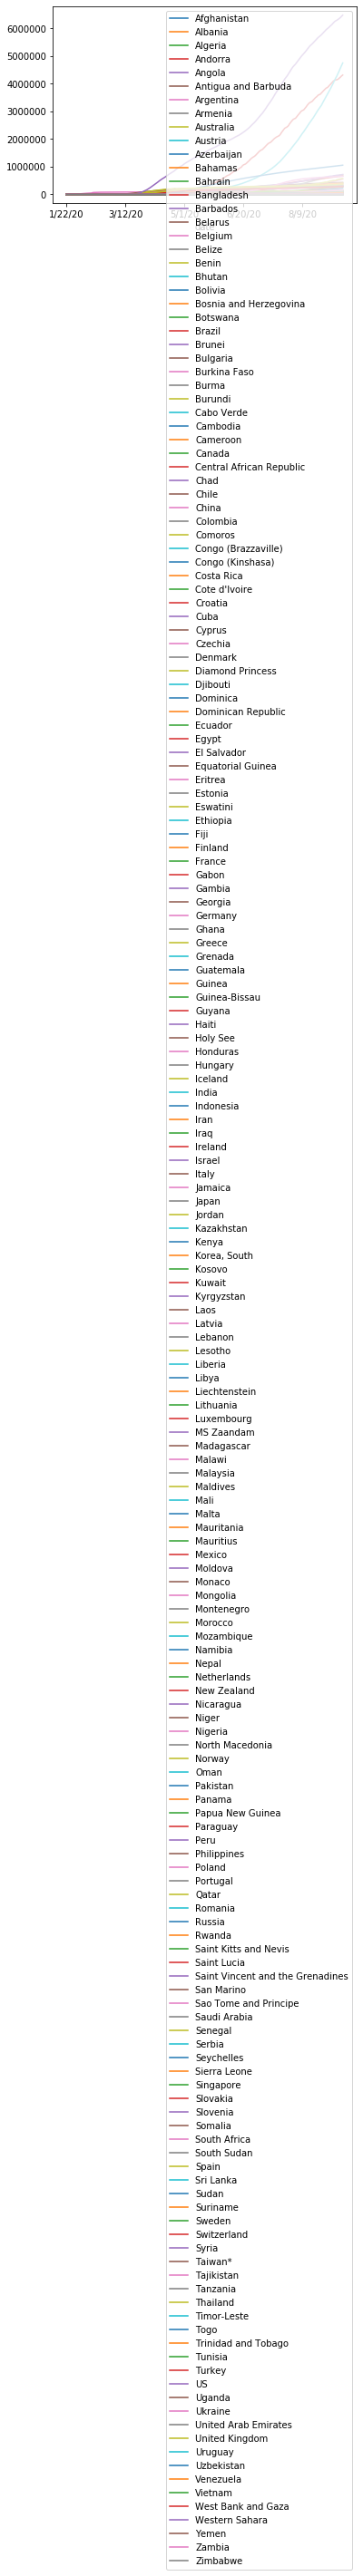

In [10]:
%matplotlib inline
df_plot.set_index('date').plot()

## Data Type Date

In [11]:
df_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [12]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [13]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [15]:
#df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep='1')
df_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [16]:
df_plot.to_csv('../data/processed/COVID_table_for_dash.csv',sep=';',index=False)

## Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)


A primary key’s main features are:

* It must contain a unique value for each row of data.
* It cannot contain null values.

In [17]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335


In [18]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a string, important for indexing

In [19]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641
1,no,Albania,0,0,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185
2,no,Algeria,0,0,0,0,0,0,0,0,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007
3,no,Andorra,0,0,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344
4,no,Angola,0,0,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335


In [20]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()


,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [21]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [22]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [23]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [24]:
df_plot.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';')

In [25]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [26]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

            date state country  confirmed
61432 2020-09-08    no      US    6327009
61698 2020-09-09    no      US    6360212
61964 2020-09-10    no      US    6396100
62230 2020-09-11    no      US    6443743
62496 2020-09-12    no      US    6485214


## Group-by apply

In [27]:
pd_JH_data=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,no,"Korea, South",1
2,2020-01-22,no,Kosovo,0
3,2020-01-22,no,Kuwait,0
4,2020-01-22,no,Kyrgyzstan,0


In [28]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                                    (pd_JH_data['country']=='Germany'))&
                                    (pd_JH_data['date']>'2020-03-20')]

In [29]:
test_data

,date,state,country,confirmed
15736,2020-03-21,no,Germany,22213
15776,2020-03-21,no,US,24508
16003,2020-03-22,no,Germany,24873
16043,2020-03-22,no,US,33152
16269,2020-03-23,no,Germany,29056
16309,2020-03-23,no,US,43850
16535,2020-03-24,no,Germany,32986
16574,2020-03-24,no,US,54112
16801,2020-03-25,no,Germany,37323
16841,2020-03-25,no,US,66055


In [30]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2020-09-12,no,260817
US,2020-09-12,no,6485214


In [31]:
# %load ../src/features/build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate

        Parameters:
        ----------
        in_array : pandas.series

        Returns:
        ----------
        Doubling rate: double
    '''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    #assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope


def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function (data structure kept)

        parameters:
        ----------
        df_input : pandas.series
        column : str
        window : int
            used data points to calculate the filter result

        Returns:
        ----------
        df_result: pd.DataFrame
            the index of the df_input has to be preserved in result
    '''

    degree=1
    df_result=df_input

    filter_in=df_input[column].fillna(0) # attention with the neutral element here

    result=signal.savgol_filter(np.array(filter_in),
                           window, # window size used for filtering
                           1)
    df_result[str(column+'_filtered')]=result
    return df_result

def rolling_reg(df_input,col='confirmed'):
    ''' Rolling Regression to approximate the doubling time'

        Parameters:
        ----------
        df_input: pd.DataFrame
        col: str
            defines the used column
        Returns:
        ----------
        result: pd.DataFrame
    '''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)



    return result




def calc_filtered_data(df_input,filter_on='confirmed'):
    '''  Calculate savgol filter and return merged data frame

        Parameters:
        ----------
        df_input: pd.DataFrame
        filter_on: str
            defines the used column
        Returns:
        ----------
        df_output: pd.DataFrame
            the result will be joined as a new column on the input data frame
    '''

    must_contain=set(['state','country',filter_on])
    assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'

    df_output=df_input.copy() # we need a copy here otherwise the filter_on column will be overwritten

    pd_filtered_result=df_output[['state','country',filter_on]].groupby(['state','country']).apply(savgol_filter)#.reset_index()

    #print('--+++ after group by apply')
    #print(pd_filtered_result[pd_filtered_result['country']=='Germany'].tail())

    #df_output=pd.merge(df_output,pd_filtered_result[['index',str(filter_on+'_filtered')]],on=['index'],how='left')
    df_output=pd.merge(df_output,pd_filtered_result[[str(filter_on+'_filtered')]],left_index=True,right_index=True,how='left')
    #print(df_output[df_output['country']=='Germany'].tail())
    return df_output.copy()





def calc_doubling_rate(df_input,filter_on='confirmed'):
    ''' Calculate approximated doubling rate and return merged data frame

        Parameters:
        ----------
        df_input: pd.DataFrame
        filter_on: str
            defines the used column
        Returns:
        ----------
        df_output: pd.DataFrame
            the result will be joined as a new column on the input data frame
    '''

    must_contain=set(['state','country',filter_on])
    assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'


    pd_DR_result= df_input.groupby(['state','country']).apply(rolling_reg,filter_on).reset_index()

    pd_DR_result=pd_DR_result.rename(columns={filter_on:filter_on+'_DR',
                             'level_2':'index'})

    #we do the merge on the index of our big table and on the index column after groupby
    df_output=pd.merge(df_input,pd_DR_result[['index',str(filter_on+'_DR')]],left_index=True,right_on=['index'],how='left')
    df_output=df_output.drop(columns=['index'])


    return df_output


if __name__ == '__main__':
    test_data_reg=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data_reg)
    print('the test slope is: '+str(result))

    pd_JH_data=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
    pd_JH_data=pd_JH_data.sort_values('date',ascending=True).copy()

    #test_structure=pd_JH_data[((pd_JH_data['country']=='US')|
    #                  (pd_JH_data['country']=='Germany'))]

    pd_result_larg=calc_filtered_data(pd_JH_data)
    pd_result_larg=calc_doubling_rate(pd_result_larg)
    pd_result_larg=calc_doubling_rate(pd_result_larg,'confirmed_filtered')


    mask=pd_result_larg['confirmed']>100
    pd_result_larg['confirmed_filtered_DR']=pd_result_larg['confirmed_filtered_DR'].where(mask, other=np.NaN)
    pd_result_larg.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)
    print(pd_result_larg[pd_result_larg['country']=='Germany'].tail())

the test slope is: [2.]
            date state  country  confirmed  confirmed_filtered  confirmed_DR  \
34070 2020-09-08    no  Germany     254957            254978.6    156.975534   
34071 2020-09-09    no  Germany     256433            256580.0    181.692436   
34072 2020-09-10    no  Germany     258149            258018.2    160.722431   
34073 2020-09-11    no  Germany     259735            259520.4    156.332930   
34074 2020-09-12    no  Germany     260817            261022.6    194.577961   

       confirmed_filtered_DR  
34070             191.543791  
34071             168.922815  
34072             168.789051  
34073             175.513218  
34074             172.760218  


In [32]:
test_data.groupby(['state','country']).agg(np.max)

date  confirmed
state country                      
no    Germany 2020-09-12     260817
      US      2020-09-12    6485214

In [33]:
#test_data.groupby(['state','country']).apply(get_doubling_time_via_regression,'confirmed')

In [34]:
test_data.groupby(['state','country']).apply(rolling_reg,'confirmed')

state  country       
no     Germany  15736            NaN
                16003            NaN
                16269       7.417994
                16535       7.142035
                16801       8.012983
                17066       6.954407
                17333       6.501919
                17598       7.390371
                17865      10.136671
                18131      13.541893
                18397      13.781393
                18663      13.140681
                18929      12.037271
                19195      12.735506
                19460      16.052694
                19727      21.372453
                19993      27.427355
                20259      27.511936
                20525      21.792179
                20791      21.495848
                21057      26.565108
                21323      36.198404
                21588      43.982990
                21855      49.423444
                22121      74.043747
                22386      56.424411
                

## Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file

In [35]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()



,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1349,1355,1371,1377,1383,1385,1398,1413,1420,1432
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,4495,4513,4542,4569,4586,4609,4639,4678,4722,4752
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,614,616,616,616,617,617,618,618,618,620
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,542,545,550,555,557,562,564,566,574,576
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1037,1049,1062,1065,1070,1071,1082,1099,1109,1114


In [36]:
# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()


In [37]:
## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [38]:
# update the large relational file

In [39]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [40]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [41]:
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [42]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

             date    state country  confirmed
62275  2020-01-22  Alabama      US          0
62276  2020-01-22  Alabama      US          0
62277  2020-01-22  Alabama      US          0
62278  2020-01-22  Alabama      US          0
62279  2020-01-22  Alabama      US          0
...           ...      ...     ...        ...
847170 2020-09-12  Wyoming      US        465
847171 2020-09-12  Wyoming      US        310
847172 2020-09-12  Wyoming      US          0
847173 2020-09-12  Wyoming      US        111
847174 2020-09-12  Wyoming      US         23

[784900 rows x 4 columns]


### cross check on full sum US data

In [43]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [44]:

check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
2020-01-27,US,5
2020-01-28,US,5
2020-01-29,US,5
2020-01-30,US,5


In [45]:
pd_JH_data=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,no,"Korea, South",1
2,2020-01-22,no,Kosovo,0
3,2020-01-22,no,Kuwait,0
4,2020-01-22,no,Kyrgyzstan,0


# Test data

In [46]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                      (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-03-20')]


In [47]:
test_data.head()


,date,state,country,confirmed
15736,2020-03-21,no,Germany,22213
15776,2020-03-21,no,US,24508
16003,2020-03-22,no,Germany,24873
16043,2020-03-22,no,US,33152
16269,2020-03-23,no,Germany,29056


In [48]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2020-09-12,no,260817
US,2020-09-12,no,6485214


In [49]:
# %load ../src/features/build_features.py

import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)

def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate'''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope




In [50]:
test_data.groupby(['state','country']).agg(np.max)

date  confirmed
state country                      
no    Germany 2020-09-12     260817
      US      2020-09-12    6485214

In [51]:
# this command will only work when adapting the get_doubling_time_via_regression function

#test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

In [52]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result
    

In [53]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state  country       
no     Germany  15736            NaN
                16003            NaN
                16269       7.417994
                16535       7.142035
                16801       8.012983
                17066       6.954407
                17333       6.501919
                17598       7.390371
                17865      10.136671
                18131      13.541893
                18397      13.781393
                18663      13.140681
                18929      12.037271
                19195      12.735506
                19460      16.052694
                19727      21.372453
                19993      27.427355
                20259      27.511936
                20525      21.792179
                20791      21.495848
                21057      26.565108
                21323      36.198404
                21588      43.982990
                21855      49.423444
                22121      74.043747
                22386      56.424411
                

In [54]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [55]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'confirmed_DR',
                             'level_2':'index'})
pd_DR_result.head()

,state,country,index,confirmed_DR
0,Alberta,Canada,0,NaN
1,Alberta,Canada,465,NaN
2,Alberta,Canada,701,NaN
3,Alberta,Canada,966,NaN
4,Alberta,Canada,1263,NaN


In [56]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,Alberta,Canada,0
1,1,2020-01-22,no,"Korea, South",1
2,2,2020-01-22,no,Kosovo,0
3,3,2020-01-22,no,Kuwait,0
4,4,2020-01-22,no,Kyrgyzstan,0


In [57]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','confirmed_DR']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,confirmed_DR
0,0,2020-01-22,Alberta,Canada,0,NaN
1,1,2020-01-22,no,"Korea, South",1,NaN
2,2,2020-01-22,no,Kosovo,0,NaN
3,3,2020-01-22,no,Kuwait,0,NaN
4,4,2020-01-22,no,Kyrgyzstan,0,NaN


In [58]:
#pd_result_larg[pd_result_larg['country']=='Germany']

# Filtering the data with groupby apply 

In [59]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result
        

In [60]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [61]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered
0,0,2020-01-22,Alberta,Canada,0,NaN,0.0
1,1,2020-01-22,no,"Korea, South",1,NaN,0.8
2,2,2020-01-22,no,Kosovo,0,NaN,0.0
3,3,2020-01-22,no,Kuwait,0,NaN,0.0
4,4,2020-01-22,no,Kyrgyzstan,0,NaN,0.0


# Filtered doubling rate

In [62]:

pd_filtered_doubling=pd_result_larg[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'confirmed_filtered_DR',
                             'level_2':'index'})

pd_filtered_doubling.tail()

,state,country,index,confirmed_filtered_DR
62505,no,Zimbabwe,61274,59.266556
62506,no,Zimbabwe,61510,57.891362
62507,no,Zimbabwe,61806,86.626761
62508,no,Zimbabwe,62042,209.776526
62509,no,Zimbabwe,62509,257.944828


In [63]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','confirmed_filtered_DR']],on=['index'],how='left')
pd_result_larg.tail()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
62505,62505,2020-09-12,no,Barbados,180,inf,180.0,-1.266637e+16
62506,62506,2020-09-12,no,Belarus,73975,384.288194,73975.2,3.850919e+02
62507,62507,2020-09-12,no,Belgium,92478,95.840489,92387.0,1.074354e+02
62508,62508,2020-09-12,no,Albania,11185,67.827692,11180.8,6.971980e+01
62509,62509,2020-09-12,no,Zimbabwe,7508,272.000000,7509.4,2.579448e+02


In [64]:
mask=pd_result_larg['confirmed']>100
pd_result_larg['confirmed_filtered_DR']=pd_result_larg['confirmed_filtered_DR'].where(mask, other=np.NaN) 


In [65]:
pd_result_larg[pd_result_larg['country']=='Germany'].tail()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
61221,61221,2020-09-08,no,Germany,254957,156.975534,254978.6,191.543791
61489,61489,2020-09-09,no,Germany,256433,181.692436,256580.0,168.922815
61753,61753,2020-09-10,no,Germany,258149,160.722431,258018.2,168.789051
62021,62021,2020-09-11,no,Germany,259735,156.332930,259520.4,175.513218
62286,62286,2020-09-12,no,Germany,260817,194.577961,261022.6,172.760218


In [66]:
pd_result_larg.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)

In [67]:
pd_JH_data=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,no,"Korea, South",1
2,2020-01-22,no,Kosovo,0
3,2020-01-22,no,Kuwait,0
4,2020-01-22,no,Kyrgyzstan,0


In [71]:
# %load ../src/features/build_features.py

import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)

def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate'''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope




In [72]:
test_data.groupby(['state','country']).agg(np.max)

date  confirmed
state country                      
no    Germany 2020-09-12     260817
      US      2020-09-12    6485214

In [73]:
# this command will only work when adapting the get_doubling_time_via_regression function

#test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

In [74]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result
    

In [75]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state  country       
no     Germany  15736            NaN
                16003            NaN
                16269       7.417994
                16535       7.142035
                16801       8.012983
                17066       6.954407
                17333       6.501919
                17598       7.390371
                17865      10.136671
                18131      13.541893
                18397      13.781393
                18663      13.140681
                18929      12.037271
                19195      12.735506
                19460      16.052694
                19727      21.372453
                19993      27.427355
                20259      27.511936
                20525      21.792179
                20791      21.495848
                21057      26.565108
                21323      36.198404
                21588      43.982990
                21855      49.423444
                22121      74.043747
                22386      56.424411
                

In [76]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [77]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'confirmed_DR',
                             'level_2':'index'})
pd_DR_result.head()

,state,country,index,confirmed_DR
0,Alberta,Canada,0,NaN
1,Alberta,Canada,465,NaN
2,Alberta,Canada,701,NaN
3,Alberta,Canada,966,NaN
4,Alberta,Canada,1263,NaN


In [78]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,Alberta,Canada,0
1,1,2020-01-22,no,"Korea, South",1
2,2,2020-01-22,no,Kosovo,0
3,3,2020-01-22,no,Kuwait,0
4,4,2020-01-22,no,Kyrgyzstan,0


In [79]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','confirmed_DR']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,confirmed_DR
0,0,2020-01-22,Alberta,Canada,0,NaN
1,1,2020-01-22,no,"Korea, South",1,NaN
2,2,2020-01-22,no,Kosovo,0,NaN
3,3,2020-01-22,no,Kuwait,0,NaN
4,4,2020-01-22,no,Kyrgyzstan,0,NaN


In [80]:
#pd_result_larg[pd_result_larg['country']=='Germany']

# Filtering the data with groupby apply 

In [81]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result
        

In [82]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [83]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered
0,0,2020-01-22,Alberta,Canada,0,NaN,0.0
1,1,2020-01-22,no,"Korea, South",1,NaN,0.8
2,2,2020-01-22,no,Kosovo,0,NaN,0.0
3,3,2020-01-22,no,Kuwait,0,NaN,0.0
4,4,2020-01-22,no,Kyrgyzstan,0,NaN,0.0


# Filtered doubling rate

In [84]:

pd_filtered_doubling=pd_result_larg[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'confirmed_filtered_DR',
                             'level_2':'index'})

pd_filtered_doubling.tail()

,state,country,index,confirmed_filtered_DR
62505,no,Zimbabwe,61274,59.266556
62506,no,Zimbabwe,61510,57.891362
62507,no,Zimbabwe,61806,86.626761
62508,no,Zimbabwe,62042,209.776526
62509,no,Zimbabwe,62509,257.944828


In [85]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','confirmed_filtered_DR']],on=['index'],how='left')
pd_result_larg.tail()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
62505,62505,2020-09-12,no,Barbados,180,inf,180.0,-1.266637e+16
62506,62506,2020-09-12,no,Belarus,73975,384.288194,73975.2,3.850919e+02
62507,62507,2020-09-12,no,Belgium,92478,95.840489,92387.0,1.074354e+02
62508,62508,2020-09-12,no,Albania,11185,67.827692,11180.8,6.971980e+01
62509,62509,2020-09-12,no,Zimbabwe,7508,272.000000,7509.4,2.579448e+02


In [86]:
mask=pd_result_larg['confirmed']>100
pd_result_larg['confirmed_filtered_DR']=pd_result_larg['confirmed_filtered_DR'].where(mask, other=np.NaN) 


In [87]:
pd_result_larg[pd_result_larg['country']=='Germany'].tail()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
61221,61221,2020-09-08,no,Germany,254957,156.975534,254978.6,191.543791
61489,61489,2020-09-09,no,Germany,256433,181.692436,256580.0,168.922815
61753,61753,2020-09-10,no,Germany,258149,160.722431,258018.2,168.789051
62021,62021,2020-09-11,no,Germany,259735,156.332930,259520.4,175.513218
62286,62286,2020-09-12,no,Germany,260817,194.577961,261022.6,172.760218


In [88]:
pd_result_larg.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)